#  Tesla stock prices 

# Goal: Analyze and forecast Tesla stock prices using time series forecasting methods.

# Models to Implement:

Statistical: ARIMA, SARIMA

Machine Learning: Facebook Prophet

Deep Learning: LSTM

Tools/Tech Stack:

Python (with Pandas, NumPy, Matplotlib, Seaborn, Plotly)

Libraries: Statsmodels, Scikit-learn, Prophet, TensorFlow/Keras

Optional deployment: Streamlit or Flask

Deliverables:

Cleaned dataset + preprocessing code

Model implementation and evaluation

Visualizations and dashboard

GitHub repo with documentation

Final report or demo

#  Load & Preprocess Data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the Tesla stock data
file_path = "/mnt/data/Tesla.csv"
df = pd.read_csv(r"C:\Users\harik\OneDrive\Pictures\Documents\Tesla.csv - Tesla.csv")

# Show the first few rows and summary info
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


(        Date       Open   High        Low      Close    Volume  Adj Close
 0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
 1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
 2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
 3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
 4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001,
 None)

#  Data Cleaning

In [15]:


# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values (forward fill as example)
df.fillna(method='ffill', inplace=True)

# Convert 'Date' column to datetime if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    # Sort dataset by Date
    df.sort_values(by='Date', inplace=True)

print("\nAfter Cleaning:\n")
print(df.head())



Missing values:
 Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

After Cleaning:

        Date       Open   High        Low      Close    Volume  Adj Close
0 2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1 2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2 2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3 2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4 2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001


C:\Users\harik\AppData\Local\Temp\ipykernel_1976\875627997.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# Exploratory Data Analysis (EDA)

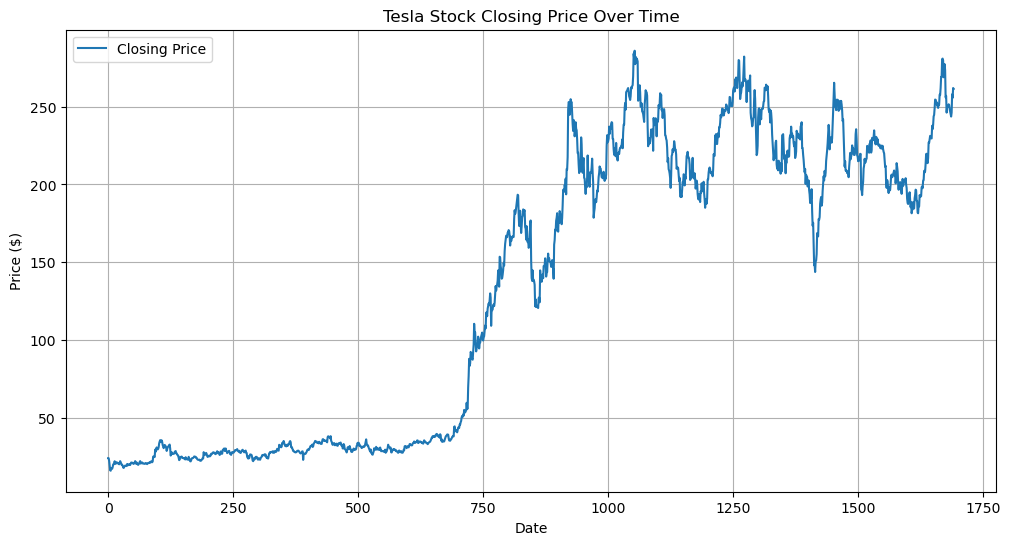

Shape of dataset: (1692, 7)

First 5 rows:
         Date       Open   High        Low      Close    Volume  Adj Close
0 2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1 2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2 2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3 2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4 2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 n

C:\Users\harik\AppData\Local\Temp\ipykernel_1976\4222507867.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


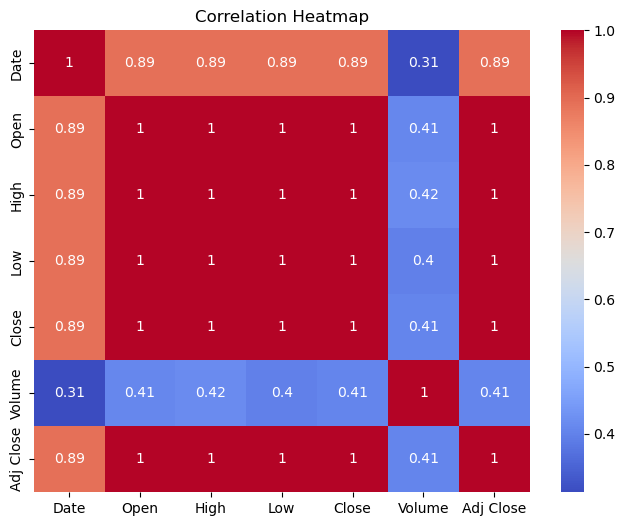

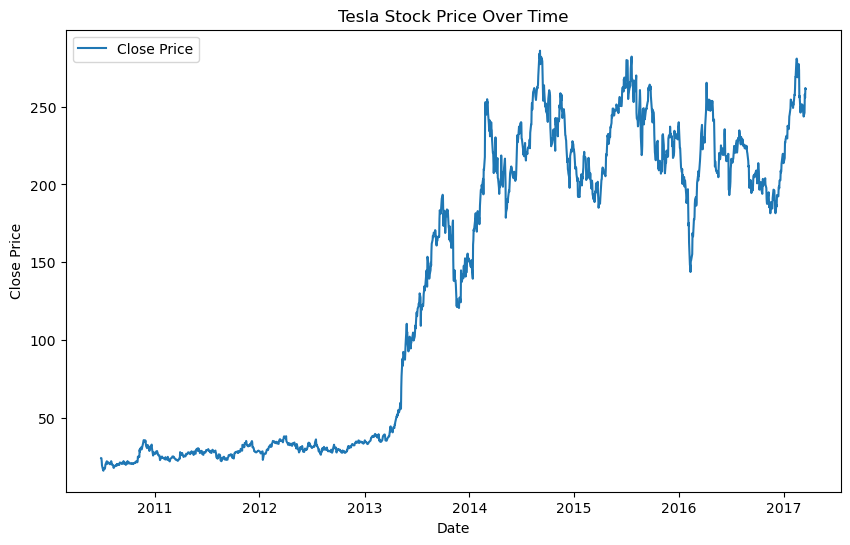


Daily Return Summary:
 count    1691.000000
mean        0.001953
std         0.032911
min        -0.193274
25%        -0.014189
50%         0.000845
75%         0.018218
max         0.243951
Name: Daily Return, dtype: float64


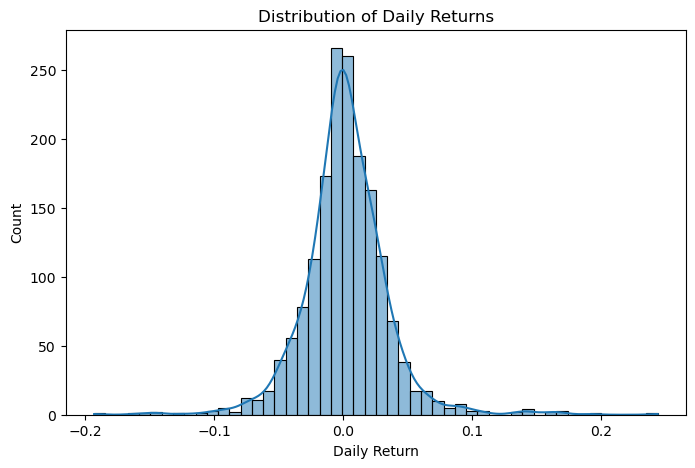

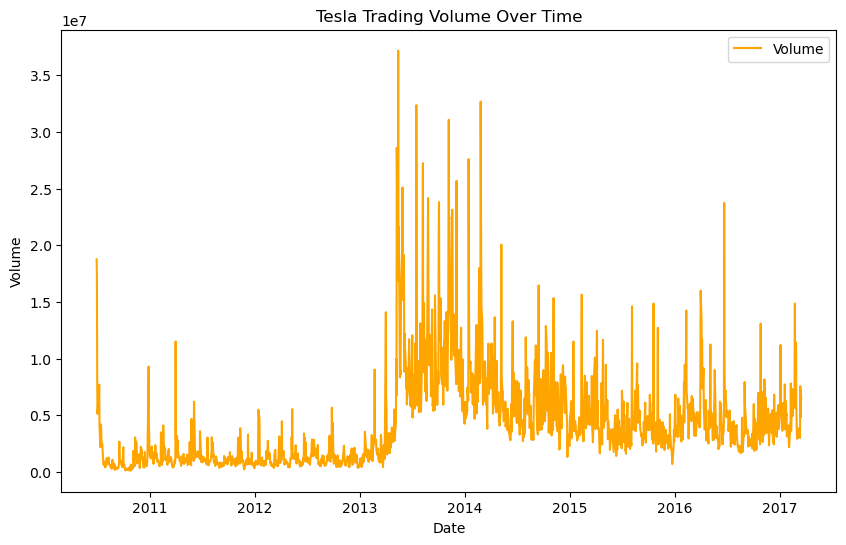


Highest Closing Price: 286.040009
Lowest Closing Price: 15.8
Max Daily Return: 0.24395054232029856
Min Daily Return: -0.19327430088495579


In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price')
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()
# 3. Basic Overview
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nInfo:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())

# 4. Data Cleaning
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values (example: forward fill)
df.fillna(method='ffill', inplace=True)

# Convert Date column to datetime (if exists)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date if time series
df.sort_values(by='Date', inplace=True)

# 5. Exploratory Data Analysis
# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Price trend over time
if 'Close' in df.columns:
    plt.figure(figsize=(10,6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.title("Tesla Stock Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()

# 6. Feature Engineering
if 'Close' in df.columns:
    df['Daily Return'] = df['Close'].pct_change()
    df['Moving_Avg_20'] = df['Close'].rolling(window=20).mean()

# 7. Statistical Analysis
if 'Daily Return' in df.columns:
    print("\nDaily Return Summary:\n", df['Daily Return'].describe())

# 8. Visualization Examples
if 'Daily Return' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
    plt.title("Distribution of Daily Returns")
    plt.show()

if 'Volume' in df.columns:
    plt.figure(figsize=(10,6))
    plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
    plt.title("Tesla Trading Volume Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.legend()
    plt.show()

# 9. Final Insights
print("\nHighest Closing Price:", df['Close'].max())
print("Lowest Closing Price:", df['Close'].min())
print("Max Daily Return:", df['Daily Return'].max())
print("Min Daily Return:", df['Daily Return'].min())


# feature engineering

In [17]:


if 'Close' in df.columns:
    # Calculate daily percentage returns
    df['Daily Return'] = df['Close'].pct_change()

    # Calculate 20-day moving average
    df['Moving_Avg_20'] = df['Close'].rolling(window=20).mean()

    # Example: Calculate 50-day moving average
    df['Moving_Avg_50'] = df['Close'].rolling(window=50).mean()

    # Example: Calculate volatility (20-day rolling std of daily returns)
    df['Volatility_20'] = df['Daily Return'].rolling(window=20).std()

print("\nFeature Engineering Completed. New columns:\n", df.columns)
print(df.head(25))



Feature Engineering Completed. New columns:
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Daily Return', 'Moving_Avg_20', 'Moving_Avg_50', 'Volatility_20'],
      dtype='object')
         Date       Open       High        Low      Close    Volume  \
0  2010-06-29  19.000000  25.000000  17.540001  23.889999  18766300   
1  2010-06-30  25.790001  30.420000  23.299999  23.830000  17187100   
2  2010-07-01  25.000000  25.920000  20.270000  21.959999   8218800   
3  2010-07-02  23.000000  23.100000  18.709999  19.200001   5139800   
4  2010-07-06  20.000000  20.000000  15.830000  16.110001   6866900   
5  2010-07-07  16.400000  16.629999  14.980000  15.800000   6921700   
6  2010-07-08  16.139999  17.520000  15.570000  17.459999   7711400   
7  2010-07-09  17.580000  17.900000  16.549999  17.400000   4050600   
8  2010-07-12  17.950001  18.070000  17.000000  17.049999   2202500   
9  2010-07-13  17.389999  18.639999  16.900000  18.139999   2680100   
10 201

# Statistical Analysis

In [18]:
# 7. Statistical Analysis

if 'Daily Return' in df.columns:
    print("\nDaily Return Summary:\n", df['Daily Return'].describe())

    # Additional metrics
    avg_return = df['Daily Return'].mean()
    median_return = df['Daily Return'].median()
    volatility = df['Daily Return'].std()

    print(f"\nAverage Daily Return: {avg_return:.4f}")
    print(f"Median Daily Return: {median_return:.4f}")
    print(f"Daily Return Volatility (Std Dev): {volatility:.4f}")



Daily Return Summary:
 count    1691.000000
mean        0.001953
std         0.032911
min        -0.193274
25%        -0.014189
50%         0.000845
75%         0.018218
max         0.243951
Name: Daily Return, dtype: float64

Average Daily Return: 0.0020
Median Daily Return: 0.0008
Daily Return Volatility (Std Dev): 0.0329


# visualization

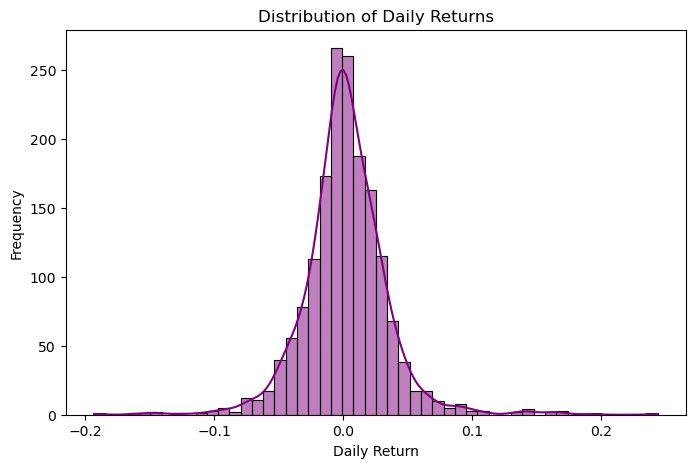

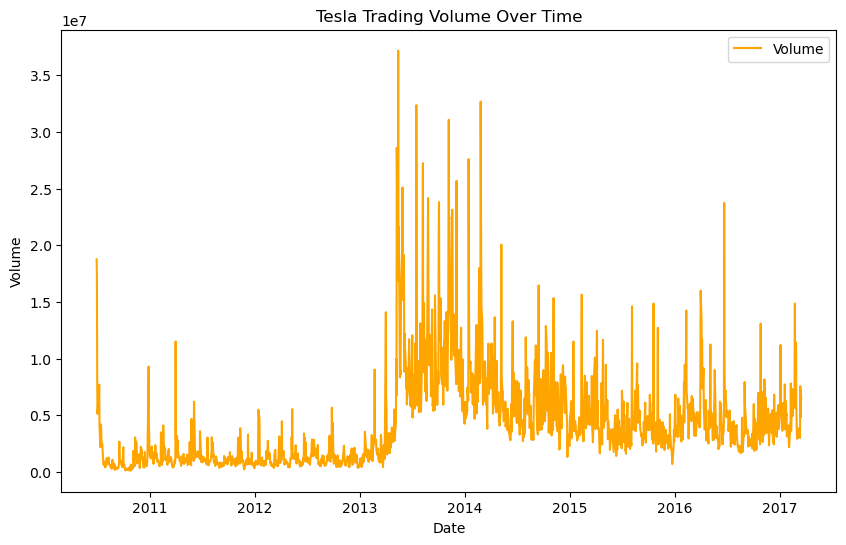

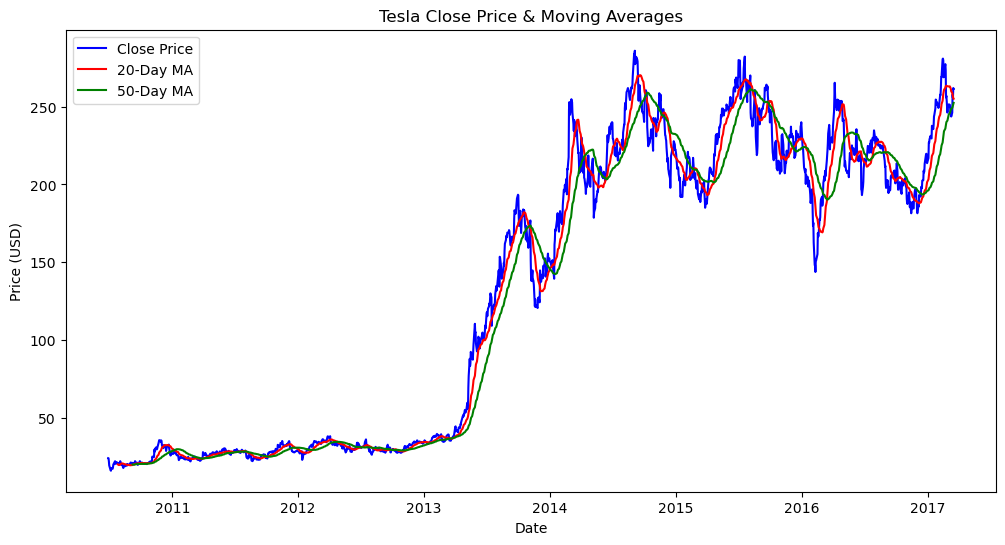

In [19]:


# Histogram of daily returns
if 'Daily Return' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True, color='purple')
    plt.title("Distribution of Daily Returns")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.show()

# Trading volume over time
if 'Volume' in df.columns:
    plt.figure(figsize=(10,6))
    plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
    plt.title("Tesla Trading Volume Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.legend()
    plt.show()

# Closing price with moving averages
if 'Close' in df.columns and 'Moving_Avg_20' in df.columns and 'Moving_Avg_50' in df.columns:
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.plot(df['Date'], df['Moving_Avg_20'], label='20-Day MA', color='red')
    plt.plot(df['Date'], df['Moving_Avg_50'], label='50-Day MA', color='green')
    plt.title("Tesla Close Price & Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()


# Final Insights

In [20]:


if 'Close' in df.columns:
    print("\nHighest Closing Price:", df['Close'].max())
    print("Lowest Closing Price:", df['Close'].min())

if 'Daily Return' in df.columns:
    print("Max Daily Return:", df['Daily Return'].max())
    print("Min Daily Return:", df['Daily Return'].min())

if 'Volume' in df.columns:
    print("Highest Trading Volume:", df['Volume'].max())
    print("Lowest Trading Volume:", df['Volume'].min())



Highest Closing Price: 286.040009
Lowest Closing Price: 15.8
Max Daily Return: 0.24395054232029856
Min Daily Return: -0.19327430088495579
Highest Trading Volume: 37163900
Lowest Trading Volume: 118500


# Modeling.

In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -0.8137329693176628
p-value: 0.8150547908640395


In [22]:
pip install prophet


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
from prophet import Prophet

# Reset index if Date is set as index
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']


In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use only the 'Close' column
data = df[['Close']].values

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences (60-day window)
X, y = [], []
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Split into train/test
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(true, predicted, name):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    print(f"\n{name} Evaluation:")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")


# save model

In [26]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Fit the ARIMA model
model = ARIMA(df['Close'], order=(5,1,2))
model_fit = model.fit()

# Now save the trained model
joblib.dump(model_fit, 'arima_model.pkl')


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


['arima_model.pkl']

In [27]:
pip install joblib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import joblib

# Example: Save ARIMA or Prophet model
joblib.dump(model, 'model_name.pkl')


['model_name.pkl']